In [1]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris.target == 2)

svm_clf = make_pipeline(
    StandardScaler(),
    LinearSVC(C=1, random_state=42)
)
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [3]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new), svm_clf.decision_function(X_new)

(array([ True, False]), array([ 0.66163816, -0.22035761]))

In [16]:
# nonlinear SVM
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

poly_svm = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, random_state=42)
)
poly_svm.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

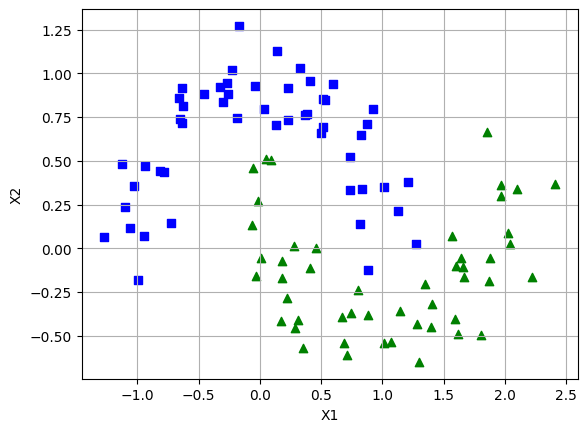

In [28]:
import numpy as np
import matplotlib.pyplot as plt

X_new = X

y_pred = poly_svm.predict(X_new)

plt.scatter(X_new[y_pred == 0][:, 0], X_new[y_pred == 0][:, 1], c='b', marker='s')
plt.scatter(X_new[y_pred == 1][:, 0], X_new[y_pred == 1][:, 1], c='g', marker='^')

plt.grid()
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

In [29]:
# polynomial kernel
from sklearn.svm import SVC

poly_kernel_svm = make_pipeline(
    StandardScaler(),
    SVC(kernel='poly', degree=3,
        coef0=1,  # how much model is influenced by high-degree terms vs low-degree terms
        C=5)
)
poly_kernel_svm.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [32]:
from sklearn.inspection import DecisionBoundaryDisplay

def plot_svm_boundary(clf, X, y):
    _, ax = plt.subplots(figsize=(4, 4))
    ax.set(xlim=(-3, 3), ylim=(-3, 3))
    
    DecisionBoundaryDisplay.from_estimator(
        estimator=clf, X=X, ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3
    )
    DecisionBoundaryDisplay.from_estimator(
        estimator=clf, X=X, ax=ax,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=['k', 'k', 'k'],
        linestyles=['--', '-', '--']
    )

    ax.scatter(X[:, 0], X[:, 1], c=y)

    plt.show()

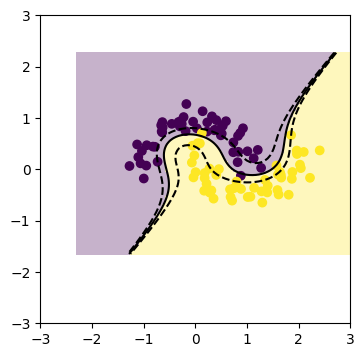

In [33]:
plot_svm_boundary(poly_kernel_svm, X, y)

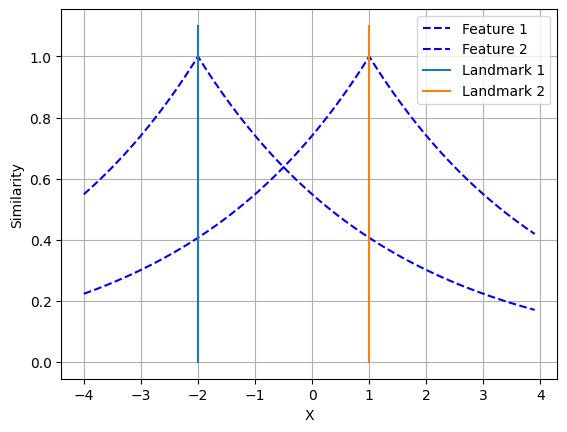

In [58]:
# similarity features

landmark_1 = -2
landmark_2 = 1
gamma = 0.3
X_check = np.arange(-4, 4, 0.1)

X_feature_1 = np.exp(-gamma * np.sqrt((X_check - landmark_1)**2))
X_feature_2 = np.exp(-gamma * np.sqrt((X_check - landmark_2)**2))

plt.plot(X_check, X_feature_1, 'b--', label='Feature 1')
plt.plot(X_check, X_feature_2, 'b--', label='Feature 2')
plt.plot([landmark_1, landmark_1], [0, 1.1], label='Landmark 1')
plt.plot([landmark_2, landmark_2], [0, 1.1], label='Landmark 2')

plt.grid()
plt.legend()
plt.xlabel('X')
plt.ylabel('Similarity')

plt.show()

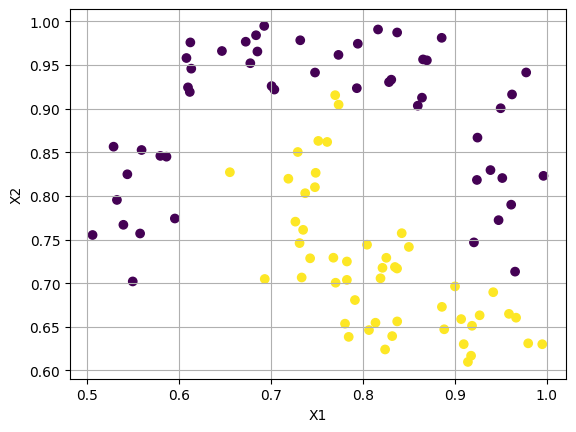

In [65]:
X_transformed = np.c_[np.exp(-gamma * np.sqrt((X[:, 0] - landmark_2)**2)),
                    np.exp(-gamma * np.sqrt((X[:, 1] - landmark_2)**2))]

plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y)

plt.grid()
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

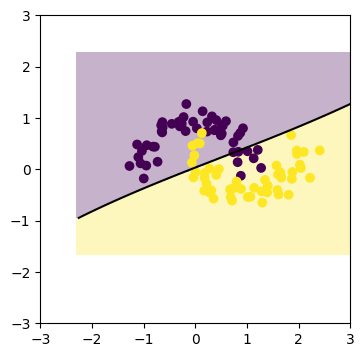

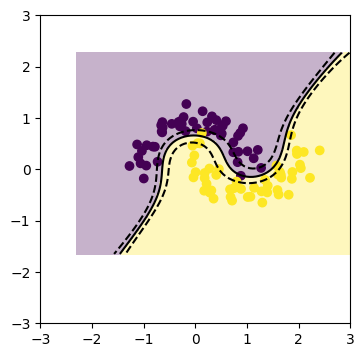

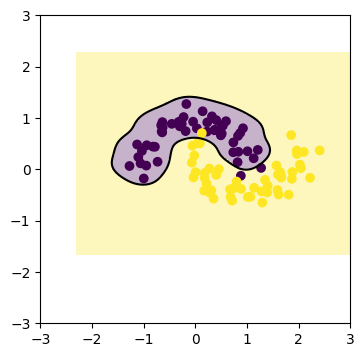

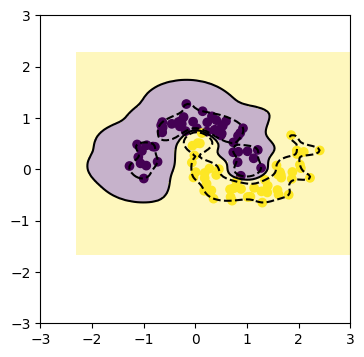

In [71]:
# gaussian rbf kernel

for gamma, C in [(0.1, 0.001), (0.1, 1000), (5, 0.001), (5, 1000)]:
    # gamma can act like regularization
    # higher gamma = more complex model (the boundary will end up more closer to individual instances)
    rbf_kernel_svm = make_pipeline(
        StandardScaler(),
        SVC(kernel='rbf', gamma=gamma, C=C)
    )
    rbf_kernel_svm.fit(X, y)
    
    plot_svm_boundary(rbf_kernel_svm, X, y)

In [77]:
# SVM for regression
from sklearn.svm import LinearSVR

# linear dataset
X = np.arange(0, 100).reshape((-1, 1))
y = 2 * X + 10
y = y.ravel()

svm_reg = make_pipeline(
    StandardScaler(),
    # eps = margin
    # adding more instances within the margin won't affect its predictions
    # so this model is epsilon-insensitive
    LinearSVR(epsilon=0.5, random_state=42)
)
svm_reg.fit(X, y)

# for non-linear
from sklearn.svm import SVR

y = 2 * X**2 + 10

svm_poly_reg = make_pipeline(
    StandardScaler(),
    SVR(kernel='poly', degree=2, C=0.01, epsilon=0.1)
)
svm_poly_reg.fit(X, y)

C:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])